# Data Preprocessing 

In [1]:
# Tasks:

# Handle missing values.
# Feature engineering.
# Split the dataset into training and test sets.

### Importing Modules

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

### Laoding Dataset

In [11]:
# renaming Credit_card_dataset as ccd

ccd = pd.read_csv(r"C:\Creditcardproject\data\Rawcreditcarddata.csv")

# Displaying all columns of the dataset

pd.pandas.set_option('display.max_columns',None)

# Displaying all Rows of the dataset for loading issue its been commented out

#pd.pandas.set_option('display.max_rows',None)

ccd.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


### Data Cleaning

#### Treating the Dublicate data

In [12]:
# checking the duplicated values
ccd.duplicated().sum()

1081

In [13]:
ccd.shape

(284807, 31)

In [14]:
# droping the values
ccd.drop_duplicates(ignore_index=True,inplace=True)

In [15]:
# The Duplicated values were removed from the dataset
ccd.duplicated().sum()
ccd.shape

(283726, 31)

### Missing Values

In [16]:
# Finding out percentage missing values in a dataset 

ccd.isnull().sum()/len(ccd)*100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

#### Missing values are not present in the Dataset

### Outlier Detection

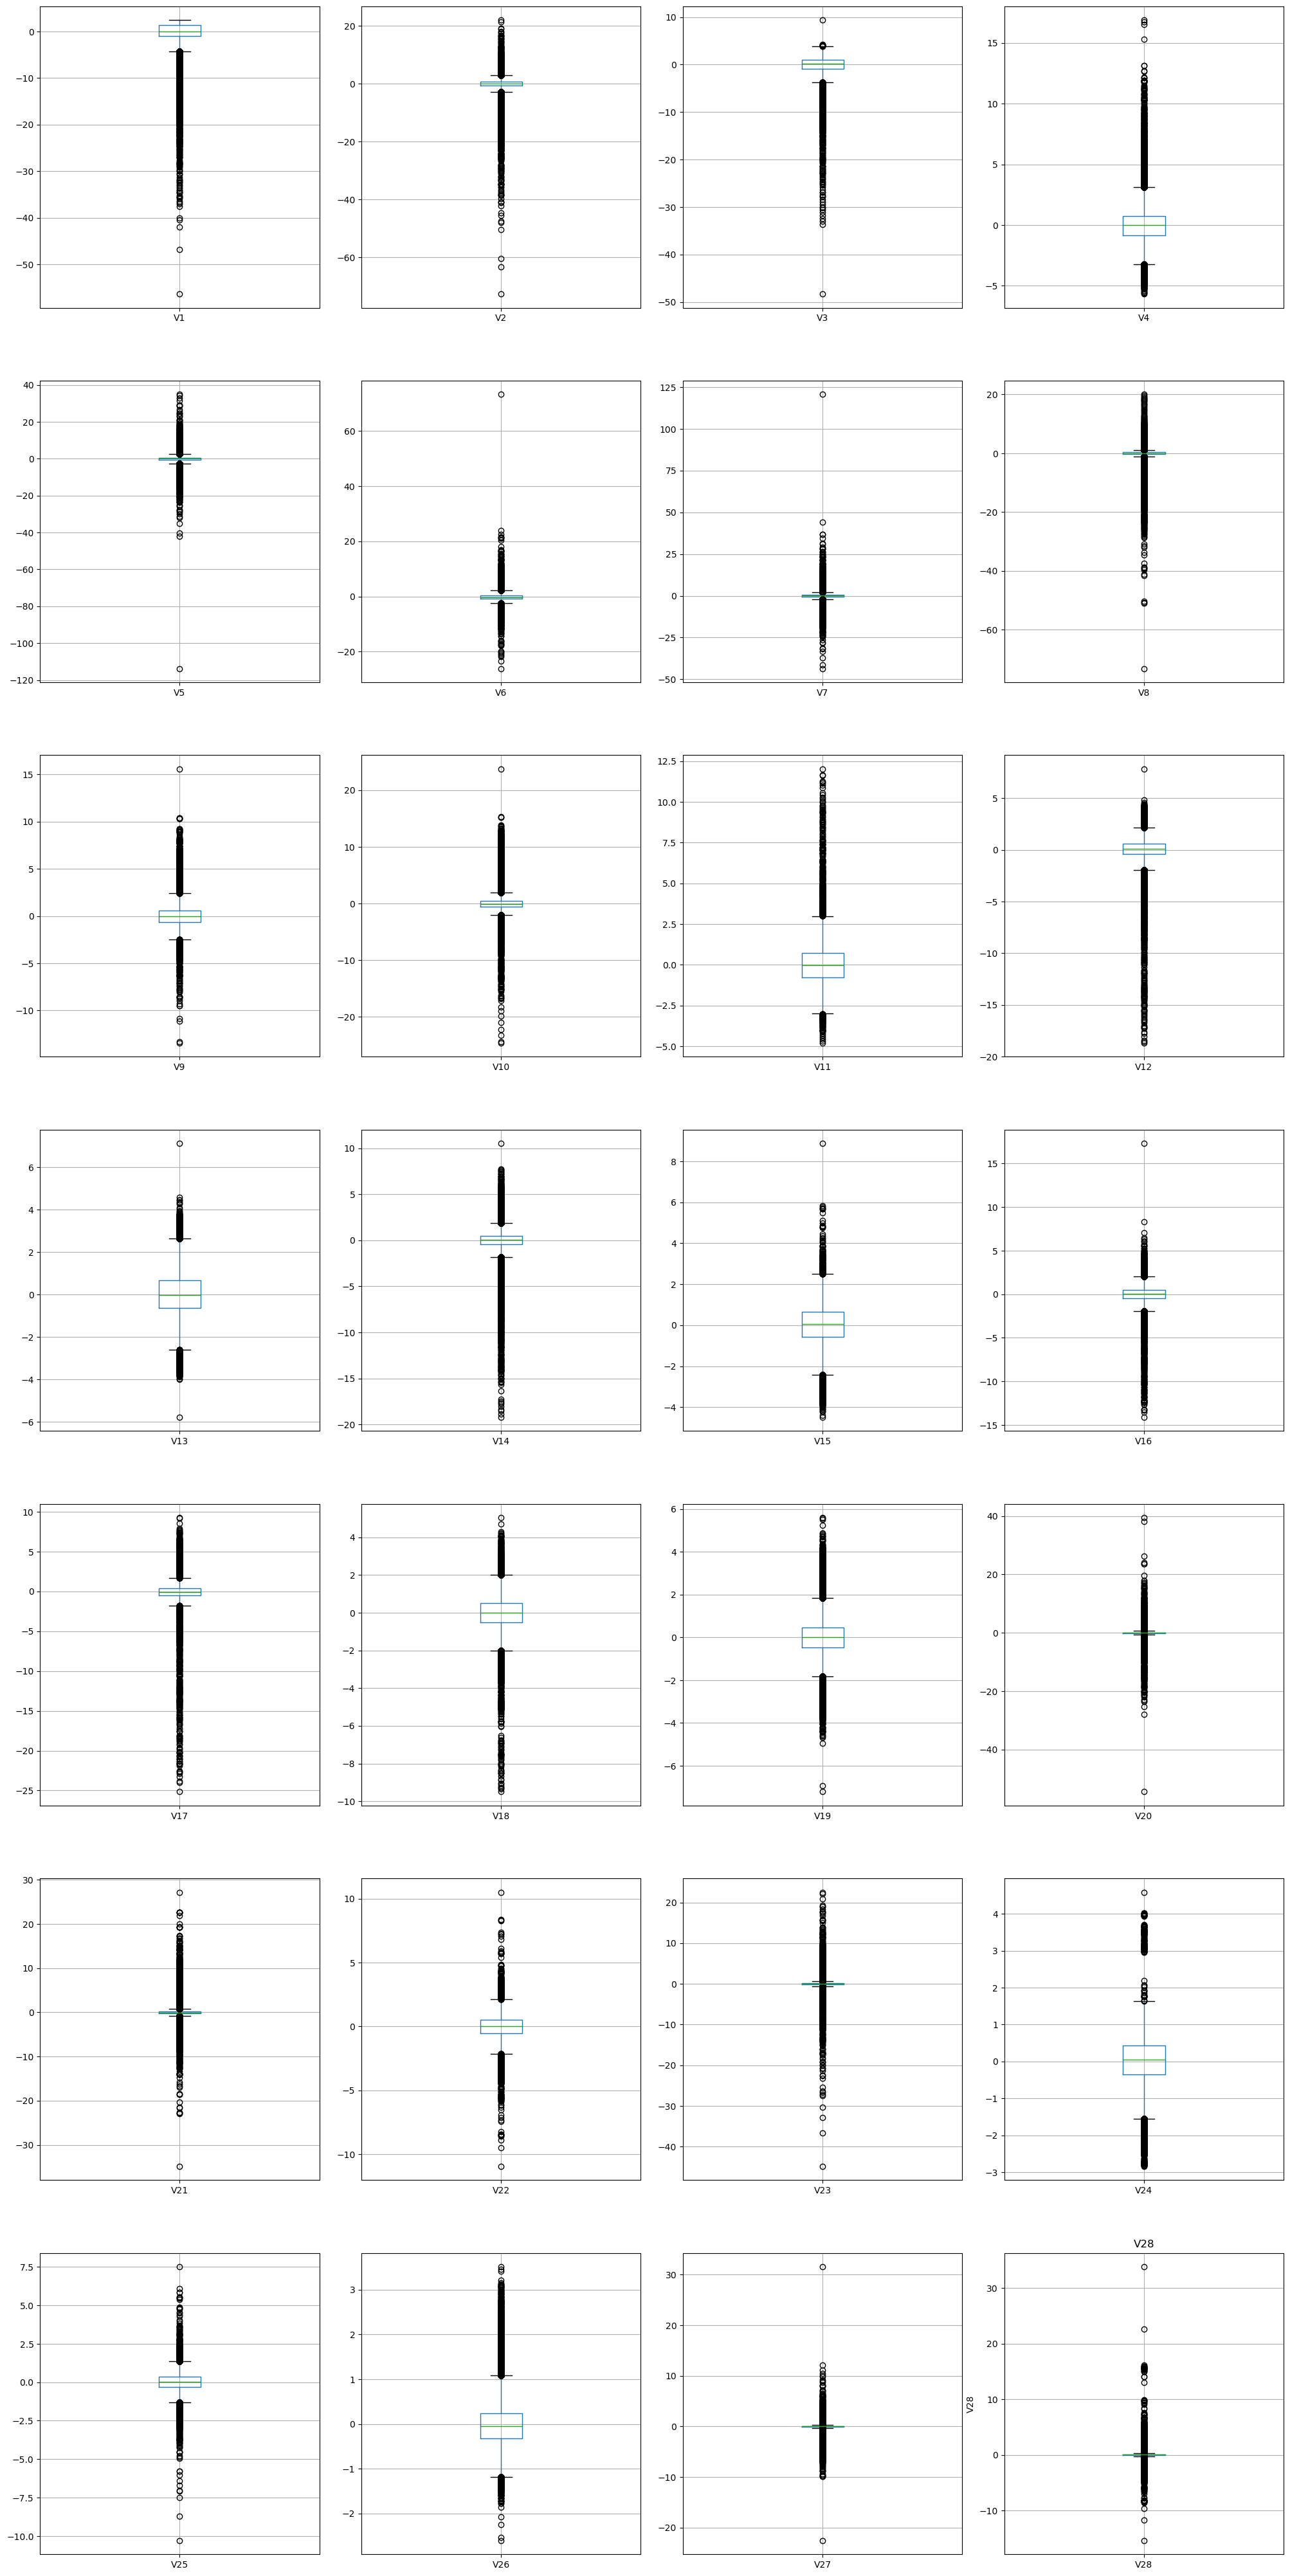

In [17]:
# Outliers Detection
ccd_temp = ccd.drop(columns=['Time','Amount','Class'],axis=1)

fig,ax = plt.subplots(ncols=4,nrows=7,figsize=(20,40))
index = 0
ax = ax.flatten()

for outliers in ccd_temp.columns:
    ccd.boxplot(column=outliers, ax=ax[index])
    index += 1
    plt.ylabel(outliers)
    plt.title(outliers)
    plt.tight_layout(pad = 0.5, w_pad=0.5, h_pad=5)

### Handling the Outliers

In [18]:
# Defining the 25th and 75th percentile
# Q1=ccd.quantile(0.25)
# Q3=ccd.quantile(0.75)

# # Tnter Quartile range
# IQR=Q3-Q1

# lower_limit = Q1-1.5*IQR
# upper_limit = Q3+1.5*IQR

# ccd_outliers = ccd[~((ccd<lower_limit) | (ccd>upper_limit)).any(axis = 1)]
# ccd_outliers

#### In this particular problem statement outliers are considered. Outliers are those entries which can disrupt our ML model performance but specifically in this case of credit card fraud detection dataset we are detecting the fraudulant transactions which could be extremly high or low. so, if we treat the outliers our model would not be able to detect the new fraudulant transactions in the future.¶

In [37]:
# Independent and Dependent Variables
x = ccd.drop(columns=['Class','Time'], axis=1)
y = ccd['Class']

0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64

### Spliting the Dataset into Train and Test

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
x_train.to_csv('C:/Creditcardproject/data/x_train.csv', index=False)
x_test.to_csv('C:/Creditcardproject/data/x_test.csv', index=False)
y_train.to_csv('C:/Creditcardproject/data/y_train.csv', index=False)
y_test.to_csv('C:/Creditcardproject/data/y_test.csv', index=False)
x.to_csv('C:/Creditcardproject/data/x.csv', index=False)

####  After saving the data into csv files we will load the data in Model Training and Evaluation file

###   *** After Data Preprocessing the next step to carry out is Model Training and Evaluation ***